In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("car_price_prediction not cleaned.csv")

# Data Wrangling(Pre-Processing)

In [3]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df.shape

(19237, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
df.tail()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


In [7]:
df["Engine volume"].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [90]:
df.select_dtypes(include="object").head()

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color
1,CHEVROLET,Equinox,Jeep,No,Petrol,Tiptronic,4x4,Left wheel,Black
2,HONDA,FIT,Hatchback,No,Petrol,Variator,Front,Right-hand drive,Black
3,FORD,Escape,Jeep,Yes,Hybrid,Automatic,4x4,Left wheel,White
4,HONDA,FIT,Hatchback,Yes,Petrol,Automatic,Front,Left wheel,Silver
6,TOYOTA,Prius,Hatchback,Yes,Hybrid,Automatic,Front,Left wheel,White


In [9]:
df["Doors"].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [10]:
df["Doors"] = df["Doors"].replace({">5":"6","02-Mar":"2","04-May":"4"}).astype("int64")

In [11]:
df["Doors"].unique()

array([4, 2, 6], dtype=int64)

In [12]:
df["Mileage"] = df["Mileage"].str.split(expand=True)[0].astype("int64")

In [13]:
df["Engine volume"] = df["Engine volume"].str.split(expand=True)[0].astype("float64")

In [14]:
df[df["Levy"] == '-'].count()

ID                  5819
Price               5819
Levy                5819
Manufacturer        5819
Model               5819
Prod. year          5819
Category            5819
Leather interior    5819
Fuel type           5819
Engine volume       5819
Mileage             5819
Cylinders           5819
Gear box type       5819
Drive wheels        5819
Doors               5819
Wheel               5819
Color               5819
Airbags             5819
dtype: int64

In [15]:
df["Levy"] = df["Levy"].replace("-",0).astype("int64")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  int64  
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  float64
 10  Mileage           19237 non-null  int64  
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  int64  
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [17]:
df = df.drop_duplicates()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  int64  
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  float64
 10  Mileage           18924 non-null  int64  
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  int64  
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

In [19]:
df.duplicated().sum()

0

In [20]:
df.rename(columns={"Engine volume":"Engine volume(Turbo)","Mileage":"Mileage(Km)","Prod. year":"Production Year"},inplace=True)

In [21]:
df.isnull().sum()

ID                      0
Price                   0
Levy                    0
Manufacturer            0
Model                   0
Production Year         0
Category                0
Leather interior        0
Fuel type               0
Engine volume(Turbo)    0
Mileage(Km)             0
Cylinders               0
Gear box type           0
Drive wheels            0
Doors                   0
Wheel                   0
Color                   0
Airbags                 0
dtype: int64

In [22]:
df.describe().drop(columns=["ID"])

,Price,Levy,Production Year,Engine volume(Turbo),Mileage(Km),Cylinders,Doors,Airbags
count,1.892400e+04,18924.000000,18924.000000,18924.000000,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,1.858744e+04,632.886493,2010.914236,2.306251,1.555373e+06,4.580216,3.931938,6.568379
std,1.921356e+05,568.273736,5.665749,0.877591,4.880221e+07,1.200223,0.428860,4.322323
min,1.000000e+00,0.000000,1939.000000,0.000000,0.000000e+00,1.000000,2.000000,0.000000
25%,5.331000e+03,0.000000,2009.000000,1.800000,7.019575e+04,4.000000,4.000000,4.000000
50%,1.317200e+04,642.000000,2012.000000,2.000000,1.264000e+05,4.000000,4.000000,6.000000
75%,2.206300e+04,917.000000,2015.000000,2.500000,1.891198e+05,4.000000,4.000000,12.000000
max,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,6.000000,16.000000


In [23]:
df.describe().drop(columns=["ID"])

,Price,Levy,Production Year,Engine volume(Turbo),Mileage(Km),Cylinders,Doors,Airbags
count,1.892400e+04,18924.000000,18924.000000,18924.000000,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,1.858744e+04,632.886493,2010.914236,2.306251,1.555373e+06,4.580216,3.931938,6.568379
std,1.921356e+05,568.273736,5.665749,0.877591,4.880221e+07,1.200223,0.428860,4.322323
min,1.000000e+00,0.000000,1939.000000,0.000000,0.000000e+00,1.000000,2.000000,0.000000
25%,5.331000e+03,0.000000,2009.000000,1.800000,7.019575e+04,4.000000,4.000000,4.000000
50%,1.317200e+04,642.000000,2012.000000,2.000000,1.264000e+05,4.000000,4.000000,6.000000
75%,2.206300e+04,917.000000,2015.000000,2.500000,1.891198e+05,4.000000,4.000000,12.000000
max,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,6.000000,16.000000


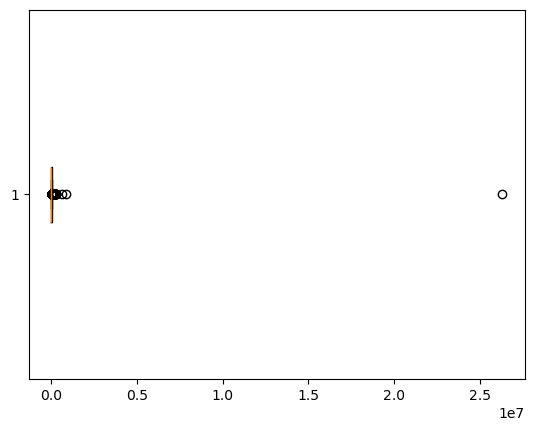

In [24]:
plt.boxplot(x=df["Price"],vert=False);

In [25]:
low , high = df["Price"].quantile([0.1,0.9])

In [26]:
remove_outliers_Price = df["Price"].between(low,high)

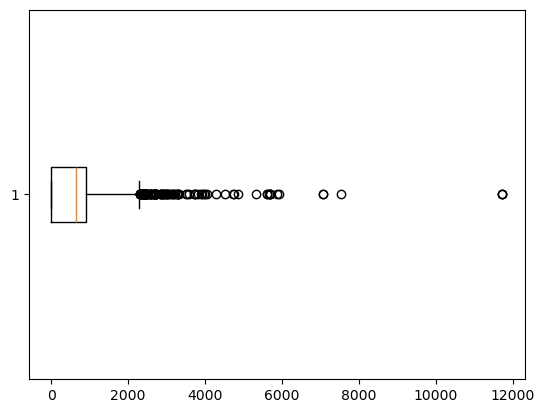

In [27]:
plt.boxplot(x=df["Levy"],vert=False);

In [28]:
low , high = df["Levy"].quantile([0.1,0.9])


In [29]:
remove_outliers_Levy = df["Levy"].between(low,high)

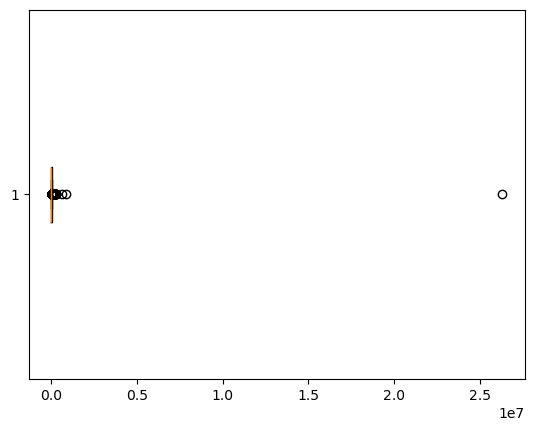

In [30]:
plt.boxplot(x=df["Price"],vert=False);

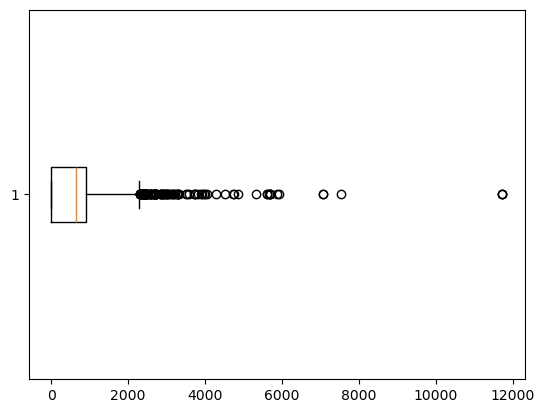

In [31]:
plt.boxplot(x=df["Levy"],vert=False);

In [32]:
df.describe().drop(columns=["ID"])

,Price,Levy,Production Year,Engine volume(Turbo),Mileage(Km),Cylinders,Doors,Airbags
count,1.892400e+04,18924.000000,18924.000000,18924.000000,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,1.858744e+04,632.886493,2010.914236,2.306251,1.555373e+06,4.580216,3.931938,6.568379
std,1.921356e+05,568.273736,5.665749,0.877591,4.880221e+07,1.200223,0.428860,4.322323
min,1.000000e+00,0.000000,1939.000000,0.000000,0.000000e+00,1.000000,2.000000,0.000000
25%,5.331000e+03,0.000000,2009.000000,1.800000,7.019575e+04,4.000000,4.000000,4.000000
50%,1.317200e+04,642.000000,2012.000000,2.000000,1.264000e+05,4.000000,4.000000,6.000000
75%,2.206300e+04,917.000000,2015.000000,2.500000,1.891198e+05,4.000000,4.000000,12.000000
max,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,6.000000,16.000000


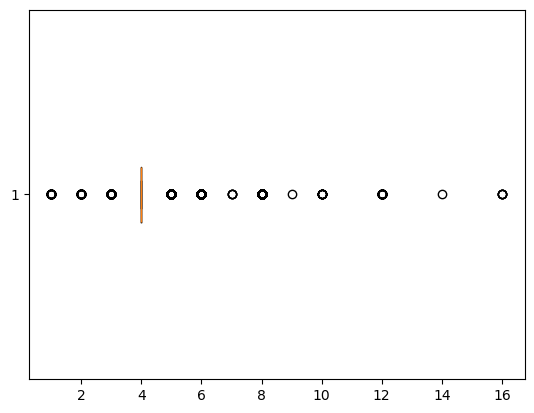

In [33]:
plt.boxplot(x=df["Cylinders"],vert=False);

In [34]:
low , high = df["Cylinders"].quantile([0.1,0.9])

In [35]:
remove_outliers_Cylinders = df["Cylinders"].between(low,high)

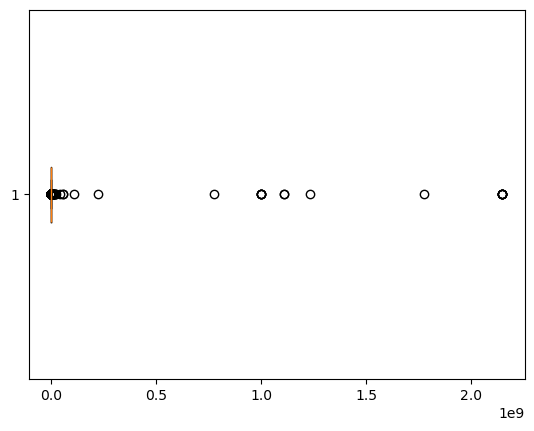

In [36]:
plt.boxplot(x=df["Mileage(Km)"],vert=False);

In [37]:
low , high = df["Mileage(Km)"].quantile([0.1,0.9])

In [38]:
remove_outliers_Mileage = df["Mileage(Km)"].between(low,high)

In [39]:
df = df[remove_outliers_Levy&remove_outliers_Price&remove_outliers_Cylinders&remove_outliers_Mileage]

In [40]:
df.shape

(11029, 18)

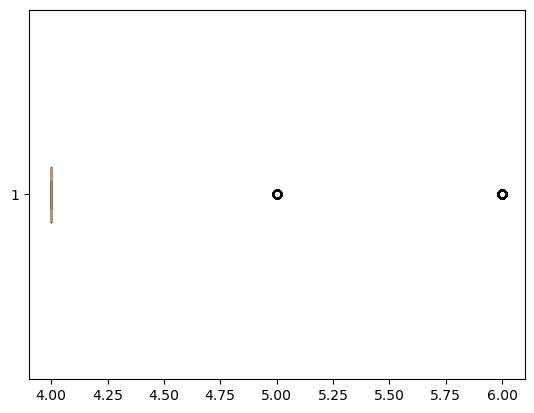

In [41]:
plt.boxplot(x=df["Cylinders"],vert=False);

In [42]:
df.describe().drop(columns=["ID"])

,Price,Levy,Production Year,Engine volume(Turbo),Mileage(Km),Cylinders,Doors,Airbags
count,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000
mean,15167.589537,522.186146,2010.943422,2.079128,131533.580198,4.282256,3.932723,6.468492
std,9110.680979,392.796859,4.922971,0.578730,57469.082384,0.689862,0.422662,4.051786
min,627.000000,0.000000,1953.000000,0.000000,25000.000000,4.000000,2.000000,0.000000
25%,8154.000000,0.000000,2010.000000,1.600000,88000.000000,4.000000,4.000000,4.000000
50%,14426.000000,638.000000,2012.000000,2.000000,128202.000000,4.000000,4.000000,5.000000
75%,20698.000000,781.000000,2014.000000,2.500000,171996.000000,4.000000,4.000000,12.000000
max,38737.000000,1273.000000,2020.000000,5.000000,265558.000000,6.000000,6.000000,16.000000


In [43]:
df.shape

(11029, 18)

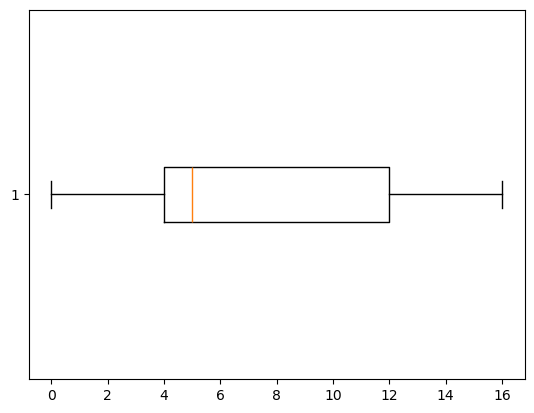

In [44]:
plt.boxplot(x=df["Airbags"],vert=False);

In [45]:
df.to_csv("Cleaned_car_pricing.csv",index=False)

# Exploratory Data Analysis(EDA)

## Price and sales analysis

#### Top 20 Manufacturer has Average Price

In [46]:
Top_AVG_Manufacter = df.groupby("Manufacturer")["Price"].mean().sort_values(ascending=False)

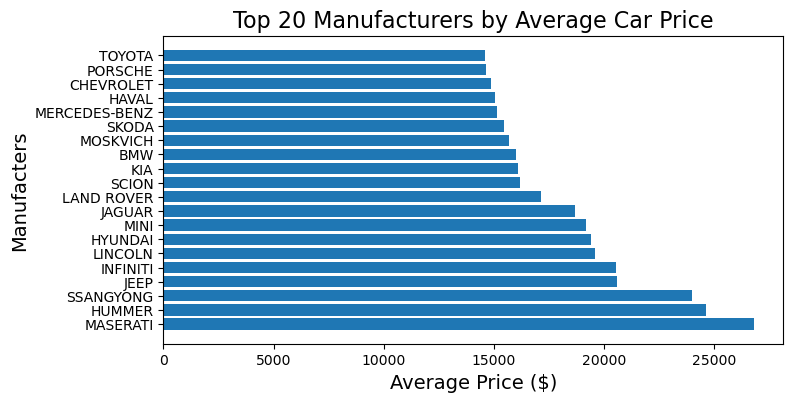

In [47]:
Top_AVG_Manufacter = Top_AVG_Manufacter.nlargest(20).round(2)
fig , ax = plt.subplots(figsize=(8,4))
ax.barh(Top_AVG_Manufacter.index , Top_AVG_Manufacter.values)
ax.set_ylabel("Manufacters",fontsize=14)
ax.set_xlabel("Average Price ($)",fontsize=14)
ax.set_title(f"Top {20} Manufacturers by Average Car Price", fontsize=16);

#### Relationship between Model year and price 

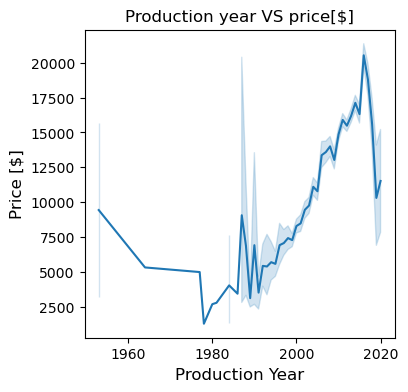

In [50]:
fig , ax = plt.subplots(figsize=(4,4))
sns.lineplot(x=df["Production Year"] , y=df["Price"])
plt.xlabel("Production Year",fontsize=12)
plt.ylabel("Price [$]",fontsize=12)
plt.title("Production year VS price[$]");

#### Most expensive category

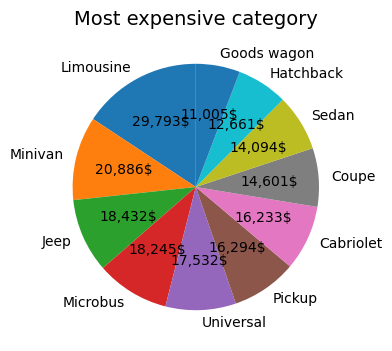

In [52]:
expensive_category = df.groupby("Category")["Price"].mean().sort_values(ascending=False).round(2)
fig , ax = plt.subplots(figsize=(4,4))
ax.pie(
    expensive_category.values , 
    labels=expensive_category.index,
    autopct=lambda p: f'{(p * sum(expensive_category.values) / 100):,.0f}$',
    startangle=90);
plt.title("Most expensive category",fontsize=14);
# ax.legend(title="Categories")


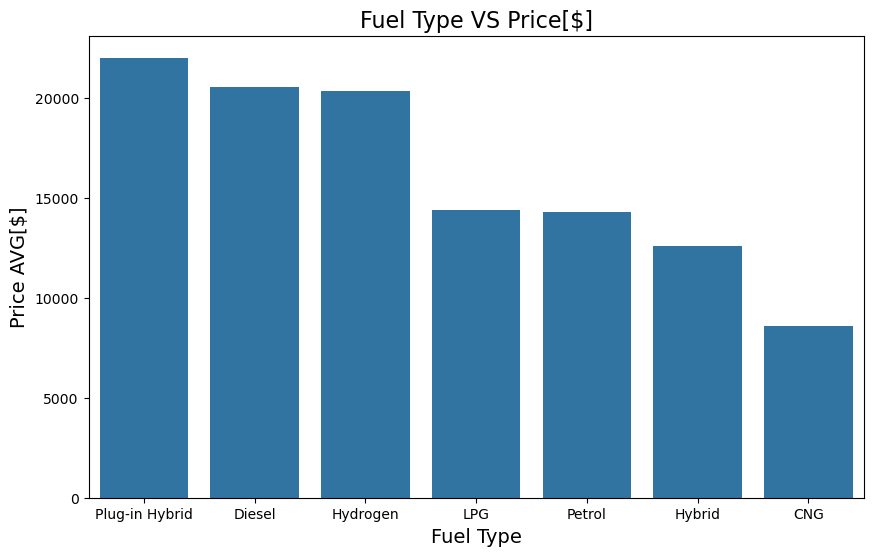

In [53]:
Data = df.groupby("Fuel type")["Price"].mean().sort_values(ascending=False).round(2)
plt.figure(figsize=(10, 6))
sns.barplot(x=Data.index, y=Data.values)
plt.xlabel("Fuel Type",fontsize=14)
plt.ylabel("Price AVG[$]",fontsize=14)
plt.title("Fuel Type VS Price[$]",fontsize=16)
# plt.xticks(rotation=45)
plt.show();

In [54]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Production Year,Category,Leather interior,Fuel type,Engine volume(Turbo),Mileage(Km),Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909,4.0,Automatic,Front,4,Left wheel,White,12


In [55]:
Top_AVG_Manufacter = df.groupby("Model")["Price"].max().sort_values(ascending=False)
Top_AVG_Manufacter

Model
Santa FE           38737
H1                 38737
XF                 38737
Genesis            38737
Tucson             38725
                   ...  
Colt Lancer         1176
HHR                 1019
Space Runner         941
24 10                750
Cooper S Cabrio      627
Name: Price, Length: 1088, dtype: int64

C:\Users\Ziad Gharieb\AppData\Local\Temp\ipykernel_9584\520213222.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Manufacturer", bbox_to_anchor=(1, 1));


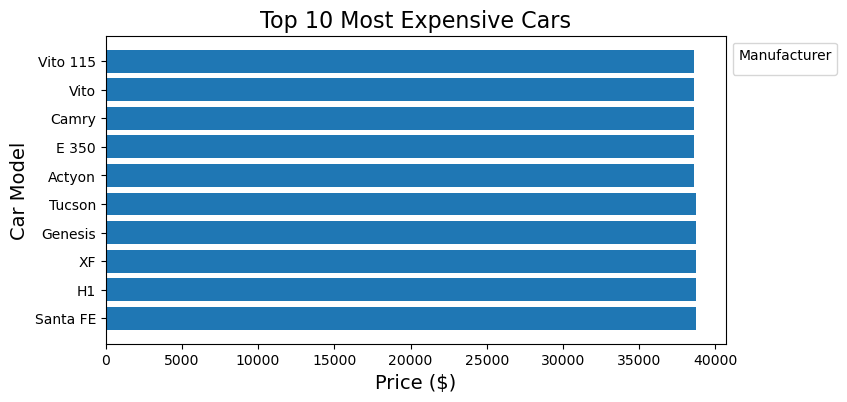

In [56]:
Top_10_Model = df.groupby("Model")["Price"].max().sort_values(ascending=False)
Top_10_Model = Top_10_Model.nlargest(10).round(2)
fig , ax = plt.subplots(figsize=(8,4))
ax.barh(Top_10_Model.index , Top_10_Model.values)
ax.set_ylabel("Car Model",fontsize=14)
ax.set_xlabel("Price ($)",fontsize=14)
ax.set_title("Top 10 Most Expensive Cars", fontsize=16);
plt.legend(title="Manufacturer", bbox_to_anchor=(1, 1));

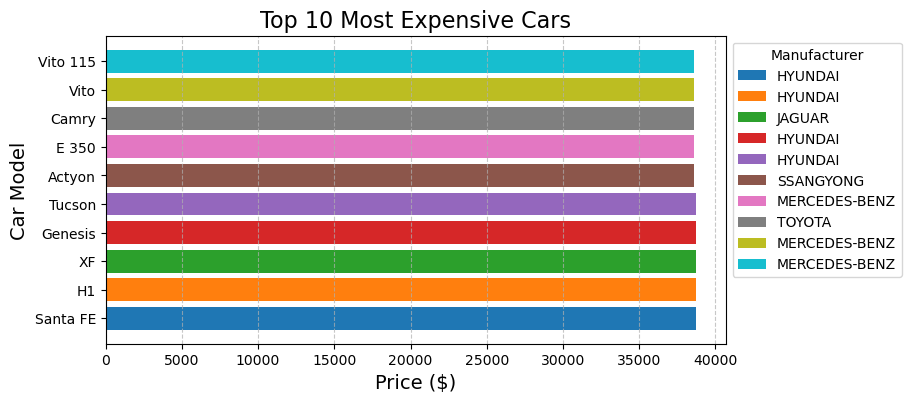

In [57]:
Top_10_Model = df.groupby("Model")["Price"].max().sort_values(ascending=False).nlargest(10).round(2)

# تجهيز بيانات الـ Manufacturer لكل موديل في التوب 10
Top_10_Data = df[df["Model"].isin(Top_10_Model.index)][["Model", "Manufacturer"]].drop_duplicates().set_index("Model")

# رسم المخطط الأفقي
fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.barh(Top_10_Model.index, Top_10_Model.values, color=plt.cm.tab10.colors[:len(Top_10_Model)])

# تجهيز الـ Legend
manufacturers = [Top_10_Data.loc[model, "Manufacturer"] for model in Top_10_Model.index]
ax.legend(bars, manufacturers, title="Manufacturer", bbox_to_anchor=(1, 1))

# إضافة العناوين
ax.set_ylabel("Car Model", fontsize=14)
ax.set_xlabel("Price ($)", fontsize=14)
ax.set_title("Top 10 Most Expensive Cars", fontsize=16)
ax.grid(axis="x", linestyle="--", alpha=0.7)

# عرض المخطط
plt.show()